## Problem Statement

Congratulations – you have been hired as Chief Data Scientist of MedCamp – a not for profit organization dedicated in making health conditions for working professionals better. MedCamp was started because the founders saw their family suffer due to bad work life balance and neglected health.

MedCamp organizes health camps in several cities with low work life balance. They reach out to working people and ask them to register for these health camps. For those who attend, MedCamp provides them facility to undergo health checks or increase awareness by visiting various stalls (depending on the format of camp). 

MedCamp has conducted 65 such events over a period of 4 years and they see a high drop off between “Registration” and Number of people taking tests at the Camps. In last 4 years, they have stored data of ~110,000 registrations they have done.

One of the huge costs in arranging these camps is the amount of inventory you need to carry. If you carry more than required inventory, you incur unnecessarily high costs. On the other hand, if you carry less than required inventory for conducting these medical checks, people end up having bad experience.

### The Process:
MedCamp employees / volunteers reach out to people and drive registrations.
During the camp, People who “ShowUp” either undergo the medical tests or visit stalls depending on the format of health camp.
 

#### Other things to note:

Since this is a completely voluntary activity for the working professionals, MedCamp usually has little profile information about these people.

For a few camps, there was hardware failure, so some information about date and time of registration is lost.
MedCamp runs 3 formats of these camps. The first and second format provides people with an instantaneous health score. 

The third format provides information about several health issues through various awareness stalls.
Favorable outcome: For the first 2 formats, a favourable outcome is defined as getting a health_score, while in the third format it is defined as visiting at least a stall.
You need to predict the chances (probability) of having a favourable outcome.

In [3]:
# import the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 100) # Display the Max Columns...

In [4]:
# Import the required dataset

train = pd.read_csv("Train.csv")
test = pd.read_csv("test_l0Auv8Q.csv")
first_hc = pd.read_csv("First_Health_Camp_Attended.csv")
second_hc = pd.read_csv("Second_Health_Camp_Attended.csv")
third_hc = pd.read_csv("Third_Health_Camp_Attended.csv")
hc_detail = pd.read_csv("Health_Camp_Detail.csv")
profile = pd.read_csv("Patient_Profile.csv")

In [5]:
train.head(2)

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5
0,489652,6578,10-Sep-05,4,0,0,0,2
1,507246,6578,18-Aug-05,45,5,0,0,7


In [6]:
test.head(2)

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5
0,505701,6548,21-May-06,1,0,0,0,2
1,500633,6584,02-Jun-06,0,0,0,0,0


In [7]:
first_hc.head(2)

,Patient_ID,Health_Camp_ID,Donation,Health_Score,Unnamed: 4
0,506181,6560,40,0.439024,NaN
1,494977,6560,20,0.097561,NaN


In [8]:
second_hc.head(2)

,Patient_ID,Health_Camp_ID,Health Score
0,526631,6536,0.875136
1,509122,6536,0.755700


In [9]:
third_hc.head(2)

,Patient_ID,Health_Camp_ID,Number_of_stall_visited,Last_Stall_Visited_Number
0,517875,6527,3,1
1,504692,6578,1,1


In [10]:
hc_detail.head(2)

,Health_Camp_ID,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3
0,6560,16-Aug-03,20-Aug-03,First,B,2
1,6530,16-Aug-03,28-Oct-03,First,C,2


In [11]:
profile.head(2)

,Patient_ID,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category
0,516956,0,0,0,0,1,90,39,18-Jun-03,NaN,Software Industry
1,507733,0,0,0,0,1,None,40,20-Jul-03,H,Software Industry


In [12]:
# Combine the Train and Test Set
combined = pd.concat([train, test], ignore_index = True)

combined.shape, train.shape, test.shape

((110527, 8), (75278, 8), (35249, 8))

In [13]:
combined.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5
0,489652,6578,10-Sep-05,4,0,0,0,2
1,507246,6578,18-Aug-05,45,5,0,0,7
2,523729,6534,29-Apr-06,0,0,0,0,0
3,524931,6535,07-Feb-04,0,0,0,0,0
4,521364,6529,28-Feb-06,15,1,0,0,7


Merge/Join the All the Healthcamps Data with Combined Data

In [14]:
# Joining Health Camps Data with Combined Dataset

combined = pd.merge(combined, first_hc, on = ["Patient_ID", "Health_Camp_ID"], how = "left")
combined = pd.merge(combined, second_hc, on = ["Patient_ID", "Health_Camp_ID"], how = "left")
combined = pd.merge(combined, third_hc, on = ["Patient_ID", "Health_Camp_ID"], how = "left")

In [15]:
# Merging hc_detail with combined
combined = pd.merge(combined, hc_detail, on = ["Health_Camp_ID"], how = "left")

In [16]:
# Patient Profile
combined=pd.merge(combined, profile, on= ['Patient_ID'], how = "left")

In [17]:
combined.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Donation,Health_Score,Unnamed: 4,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category
0,489652,6578,10-Sep-05,4,0,0,0,2,NaN,NaN,NaN,NaN,2.0,1.0,16-Aug-05,14-Oct-05,Third,G,2,0,0,0,0,None,None,None,06-Dec-04,NaN,NaN
1,507246,6578,18-Aug-05,45,5,0,0,7,NaN,NaN,NaN,NaN,NaN,NaN,16-Aug-05,14-Oct-05,Third,G,2,0,0,0,0,1,75,40,08-Sep-04,C,Others
2,523729,6534,29-Apr-06,0,0,0,0,0,NaN,NaN,NaN,0.402054,NaN,NaN,17-Oct-05,07-Nov-07,Second,A,2,0,0,0,0,None,None,None,22-Jun-04,NaN,NaN
3,524931,6535,07-Feb-04,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,01-Feb-04,18-Feb-04,First,E,2,0,0,0,0,None,None,None,07-Feb-04,I,NaN
4,521364,6529,28-Feb-06,15,1,0,0,7,NaN,NaN,NaN,0.845597,NaN,NaN,30-Mar-06,03-Apr-06,Second,A,2,0,0,0,1,1,70,40,04-Jul-03,I,Technology


In [18]:
# Drop the Unnamed 4 Column
combined.drop("Unnamed: 4", axis = 1, inplace = True)

In [19]:
combined.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Donation,Health_Score,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category
0,489652,6578,10-Sep-05,4,0,0,0,2,NaN,NaN,NaN,2.0,1.0,16-Aug-05,14-Oct-05,Third,G,2,0,0,0,0,None,None,None,06-Dec-04,NaN,NaN
1,507246,6578,18-Aug-05,45,5,0,0,7,NaN,NaN,NaN,NaN,NaN,16-Aug-05,14-Oct-05,Third,G,2,0,0,0,0,1,75,40,08-Sep-04,C,Others
2,523729,6534,29-Apr-06,0,0,0,0,0,NaN,NaN,0.402054,NaN,NaN,17-Oct-05,07-Nov-07,Second,A,2,0,0,0,0,None,None,None,22-Jun-04,NaN,NaN
3,524931,6535,07-Feb-04,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,01-Feb-04,18-Feb-04,First,E,2,0,0,0,0,None,None,None,07-Feb-04,I,NaN
4,521364,6529,28-Feb-06,15,1,0,0,7,NaN,NaN,0.845597,NaN,NaN,30-Mar-06,03-Apr-06,Second,A,2,0,0,0,1,1,70,40,04-Jul-03,I,Technology


In [20]:
# Combining all the Online Activity
combined["Online_Activity"] = combined.Online_Follower+combined.LinkedIn_Shared+\
combined.Twitter_Shared+combined.Facebook_Shared

In [21]:
# Online Activity
combined.Online_Activity.value_counts(normalize = True)

0    0.895166
2    0.035855
1    0.032363
3    0.027278
4    0.009337
Name: Online_Activity, dtype: float64

Challenge is that they see a high drop off between “Registration” and Number of people taking tests 

In [22]:
# Registration Date, Camp Start and End Date, First Interaction Date

combined['Registration_Date'] = pd.to_datetime(combined.Registration_Date, 
                                               dayfirst = True) # ddmmyy

# Camp Start Date
combined['Camp_Start_Date'] = pd.to_datetime(combined.Camp_Start_Date, 
                                               dayfirst = True) # ddmmyy

#Camp End Date
combined['Camp_End_Date'] = pd.to_datetime(combined.Camp_End_Date, 
                                               dayfirst = True) # ddmmyy

#First Interaction Date
combined['First_Interaction'] = pd.to_datetime(combined.First_Interaction, 
                                               dayfirst = True) # ddmmyy

In [23]:
# Interaction Days...
combined["Interaction_Days"] = (combined.Registration_Date - 
                                combined.First_Interaction).dt.days

In [24]:
combined.Interaction_Days.describe()

count    110193.000000
mean        249.117076
std         326.026614
min           0.000000
25%           8.000000
50%          77.000000
75%         420.000000
max        1543.000000
Name: Interaction_Days, dtype: float64

In [25]:
# Camp Duration
combined["Camp_Duration"] = np.abs((combined.Camp_End_Date - 
                                    combined.Camp_Start_Date).dt.days)

In [26]:
# Camp Start Date - Registration Date
combined["Headstart"] = np.abs((combined.Camp_Start_Date - 
                                combined.Registration_Date).dt.days)

In [27]:
# Camp End Date - Registration Date
combined["Camp_end_Reg_Duration"] = np.abs((combined.Camp_End_Date - 
                                combined.Registration_Date).dt.days)

In [28]:
# Registration Days
combined["Registration_Days"] = combined.Registration_Date.dt.day

# Registration Month
combined["Registration_Month"] = combined.Registration_Date.dt.month

# Registration Year
combined["Registration_Year"] = combined.Registration_Date.dt.year

In [29]:
# Camp Start Year & End Year
combined["Camp_Start_Year"] = combined.Camp_Start_Date.dt.year
combined["Camp_End_Year"] = combined.Camp_End_Date.dt.year

combined["Camp_Start_Month"] = combined.Camp_Start_Date.dt.month
combined["Camp_End_Month"] = combined.Camp_End_Date.dt.month

In [30]:
combined["Camp_Duration_Month"]= np.abs(combined.Camp_End_Month - 
                                        combined.Camp_Start_Month)

In [31]:
combined.head(2)

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Donation,Health_Score,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Online_Activity,Interaction_Days,Camp_Duration,Headstart,Camp_end_Reg_Duration,Registration_Days,Registration_Month,Registration_Year,Camp_Start_Year,Camp_End_Year,Camp_Start_Month,Camp_End_Month,Camp_Duration_Month
0,489652,6578,2005-09-10,4,0,0,0,2,NaN,NaN,NaN,2.0,1.0,2005-08-16,2005-10-14,Third,G,2,0,0,0,0,None,None,None,2004-12-06,NaN,NaN,0,278.0,59,25.0,34.0,10.0,9.0,2005.0,2005,2005,8,10,2
1,507246,6578,2005-08-18,45,5,0,0,7,NaN,NaN,NaN,NaN,NaN,2005-08-16,2005-10-14,Third,G,2,0,0,0,0,1,75,40,2004-09-08,C,Others,0,344.0,59,2.0,57.0,18.0,8.0,2005.0,2005,2005,8,10,2


* 10-Sept-2005 - 106 patients who registered
* Across all the Years, How many Patients Registered on 1-31 days.

In [32]:
# Unique No of Patients every day/month/year
combined.groupby("Registration_Date")["Patient_ID"].transform("nunique")

0         106.0
1         134.0
2          65.0
3         139.0
4          58.0
          ...  
110522     93.0
110523     70.0
110524    292.0
110525     57.0
110526    354.0
Name: Patient_ID, Length: 110527, dtype: float64

In [33]:
len(combined.loc[combined.Registration_Date=='2005-09-10', "Patient_ID"].unique())

106

In [34]:
# Unique No of Patients on the Registration Date
combined["Patient_Count_Reg_Date"] = combined.groupby("Registration_Date")\
["Patient_ID"].transform("nunique")

In [35]:
combined["Patient_Per_Day"]= combined.groupby("Registration_Days")\
["Patient_ID"].transform("nunique")

combined["Patient_Per_Month"]= combined.groupby("Registration_Month")\
["Patient_ID"].transform("nunique")

combined["Patient_Per_Year"]= combined.groupby("Registration_Year")\
["Patient_ID"].transform("nunique")

In [36]:
# Unique No of Health Camps Occurred during that Date
combined["Health_Camp_Count"] = combined.groupby("Registration_Date")\
["Health_Camp_ID"].transform("nunique")

In [37]:
# No of Patients in the Healthcamps

combined["Paient_HC_Count"] =combined.groupby("Health_Camp_ID")\
["Patient_ID"].transform("nunique")

In [38]:
# No of health Camp Happened every month
combined.loc[combined.Camp_End_Month==11, "Health_Camp_ID"].count()

# No of health Camp Happened every Year

23235

In [39]:
combined["Health_Camp_Month_FC"] = combined.groupby("Camp_End_Month")\
["Health_Camp_ID"].transform("nunique")

combined["Health_Camp_Year_FC"] = combined.groupby("Camp_End_Year")\
["Health_Camp_ID"].transform("nunique")

In [40]:
combined.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Donation,Health_Score,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Online_Activity,Interaction_Days,Camp_Duration,Headstart,Camp_end_Reg_Duration,Registration_Days,Registration_Month,Registration_Year,Camp_Start_Year,Camp_End_Year,Camp_Start_Month,Camp_End_Month,Camp_Duration_Month,Patient_Count_Reg_Date,Patient_Per_Day,Patient_Per_Month,Patient_Per_Year,Health_Camp_Count,Paient_HC_Count,Health_Camp_Month_FC,Health_Camp_Year_FC
0,489652,6578,2005-09-10,4,0,0,0,2,NaN,NaN,NaN,2.0,1.0,2005-08-16,2005-10-14,Third,G,2,0,0,0,0,None,None,None,2004-12-06,NaN,NaN,0,278.0,59,25.0,34.0,10.0,9.0,2005.0,2005,2005,8,10,2,106.0,2649.0,6585.0,15710.0,4.0,2837,5,19
1,507246,6578,2005-08-18,45,5,0,0,7,NaN,NaN,NaN,NaN,NaN,2005-08-16,2005-10-14,Third,G,2,0,0,0,0,1,75,40,2004-09-08,C,Others,0,344.0,59,2.0,57.0,18.0,8.0,2005.0,2005,2005,8,10,2,134.0,3620.0,5804.0,15710.0,6.0,2837,5,19
2,523729,6534,2006-04-29,0,0,0,0,0,NaN,NaN,0.402054,NaN,NaN,2005-10-17,2007-11-07,Second,A,2,0,0,0,0,None,None,None,2004-06-22,NaN,NaN,0,676.0,751,194.0,557.0,29.0,4.0,2006.0,2005,2007,10,11,1,65.0,2518.0,4785.0,19318.0,4.0,3597,8,9
3,524931,6535,2004-02-07,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2004-02-01,2004-02-18,First,E,2,0,0,0,0,None,None,None,2004-02-07,I,NaN,0,0.0,17,6.0,11.0,7.0,2.0,2004.0,2004,2004,2,2,0,139.0,2363.0,5029.0,9646.0,3.0,1882,6,14
4,521364,6529,2006-02-28,15,1,0,0,7,NaN,NaN,0.845597,NaN,NaN,2006-03-30,2006-04-03,Second,A,2,0,0,0,1,1,70,40,2003-07-04,I,Technology,1,970.0,4,30.0,34.0,28.0,2.0,2006.0,2006,2006,3,4,1,58.0,3012.0,5029.0,19318.0,6.0,3823,5,18


### Creating Target Variable

##### Favorable outcome:
* For the first 2 formats, a favourable outcome is defined as getting a health_score, while in the third format it is defined as visiting at least a stall.
* You need to predict the chances (probability) of having a favourable outcome.

In [41]:
# defined as getting a health_score - Yes/No
# visiting at least a stall - Yes or No
# 'Health_Score', 'Health Score','Number_of_stall_visited'

# If Health_Score>0 or Health Score > 0 or No of Stall Visited > 0, Last_Stall_Visited_Number > 0= 1 else 0

def tgt(first_hs, sec_hs, stall_visit, no_stall):
    if((first_hs>0) or (sec_hs>0) or (stall_visit>0) or (no_stall>0)):
        return(1)
    else:
        return(0)

In [42]:
combined["Target"] = combined.apply(lambda x:tgt(x["Health_Score"],
                           x["Health Score"],
                           x["Number_of_stall_visited"],
                           x["Last_Stall_Visited_Number"]),axis=1)

In [43]:
combined.Target.value_counts()

0    89993
1    20534
Name: Target, dtype: int64

In [44]:
# Drop the Unwanted Vars.

new = combined.drop(["Donation", "Health_Score", "Health Score",
                    "Number_of_stall_visited", "Last_Stall_Visited_Number",
                    "Camp_Start_Date", "Camp_End_Date", "Registration_Date",
                    "Online_Follower", 
                     "LinkedIn_Shared", "Twitter_Shared",
                    "Facebook_Shared", "First_Interaction", 
                     "Patient_ID", "Health_Camp_ID"], axis = 1)

In [45]:
# Replace None with np.Nan
new.replace(to_replace = "None", value = np.NaN, inplace = True)

In [46]:
new.head()

,Var1,Var2,Var3,Var4,Var5,Category1,Category2,Category3,Income,Education_Score,Age,City_Type,Employer_Category,Online_Activity,Interaction_Days,Camp_Duration,Headstart,Camp_end_Reg_Duration,Registration_Days,Registration_Month,Registration_Year,Camp_Start_Year,Camp_End_Year,Camp_Start_Month,Camp_End_Month,Camp_Duration_Month,Patient_Count_Reg_Date,Patient_Per_Day,Patient_Per_Month,Patient_Per_Year,Health_Camp_Count,Paient_HC_Count,Health_Camp_Month_FC,Health_Camp_Year_FC,Target
0,4,0,0,0,2,Third,G,2,NaN,NaN,NaN,NaN,NaN,0,278.0,59,25.0,34.0,10.0,9.0,2005.0,2005,2005,8,10,2,106.0,2649.0,6585.0,15710.0,4.0,2837,5,19,1
1,45,5,0,0,7,Third,G,2,1,75,40,C,Others,0,344.0,59,2.0,57.0,18.0,8.0,2005.0,2005,2005,8,10,2,134.0,3620.0,5804.0,15710.0,6.0,2837,5,19,0
2,0,0,0,0,0,Second,A,2,NaN,NaN,NaN,NaN,NaN,0,676.0,751,194.0,557.0,29.0,4.0,2006.0,2005,2007,10,11,1,65.0,2518.0,4785.0,19318.0,4.0,3597,8,9,1
3,0,0,0,0,0,First,E,2,NaN,NaN,NaN,I,NaN,0,0.0,17,6.0,11.0,7.0,2.0,2004.0,2004,2004,2,2,0,139.0,2363.0,5029.0,9646.0,3.0,1882,6,14,0
4,15,1,0,0,7,Second,A,2,1,70,40,I,Technology,1,970.0,4,30.0,34.0,28.0,2.0,2006.0,2006,2006,3,4,1,58.0,3012.0,5029.0,19318.0,6.0,3823,5,18,1


<AxesSubplot:>

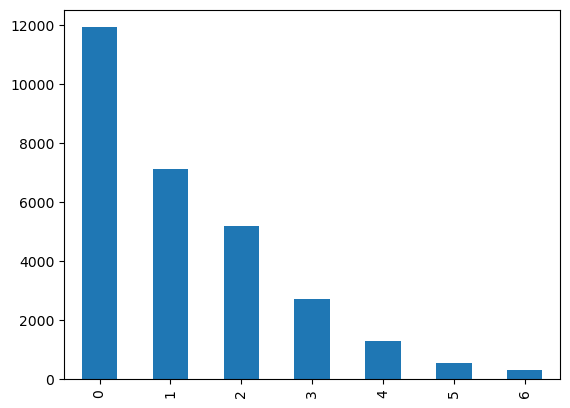

In [47]:
new.Income.value_counts().plot(kind = "bar")

In [48]:
pd.DataFrame(pd.factorize(new.Income)[0])[0].value_counts()

-1    81342
 1    11919
 0     7132
 4     5209
 5     2728
 3     1310
 6      566
 2      321
Name: 0, dtype: int64

In [49]:
new.loc[new.Income.isnull(), "Target"].value_counts()

0    68065
1    13277
Name: Target, dtype: int64

In [50]:
new.loc[new.Income.notnull(), "Target"].value_counts()

0    21928
1     7257
Name: Target, dtype: int64

In [51]:
# Apply Factorize to Convert the np.NAN to some Number
new["Income"] = pd.factorize(new.Income)[0]
new["Education_Score"] = pd.factorize(new.Education_Score)[0]
new["City_Type"] = pd.factorize(new.City_Type)[0]

In [52]:
new.Age.dropna().describe()

count     32602
unique       50
top          41
freq       2568
Name: Age, dtype: object

In [53]:
# Since Age is also categorical as per the above cell...we can factorize it
new["Age"] = pd.factorize(new.Age)[0]
new["Employer_Category"] = pd.factorize(new.Employer_Category)[0]

In [54]:
# Missing Value Columns
cols = new.isnull().sum()[new.isnull().sum()!=0].index

In [55]:
cols

Index(['Interaction_Days', 'Headstart', 'Camp_end_Reg_Duration',
       'Registration_Days', 'Registration_Month', 'Registration_Year',
       'Patient_Count_Reg_Date', 'Patient_Per_Day', 'Patient_Per_Month',
       'Patient_Per_Year', 'Health_Camp_Count'],
      dtype='object')

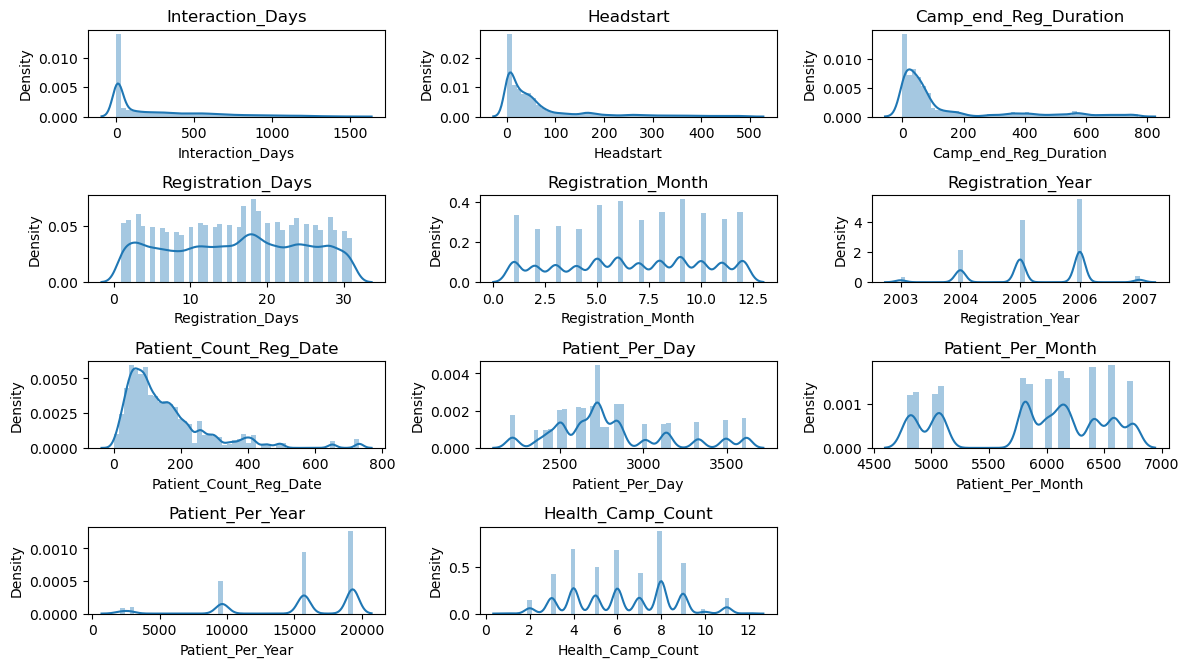

In [56]:
# Loop to impute the Missing Values using Median
nrows = 5
ncols = 3
rep = 1

plt.figure(figsize = (12, 8))
for i in cols:
    plt.subplot(nrows, ncols, rep)
    sns.distplot(new.loc[:, i])
    plt.title(i)
    rep = rep+1
    
plt.tight_layout()
plt.show()

In [57]:
# Imputting the Median
for i in cols:
    new.loc[:, i].fillna(new.loc[:, i].median(), inplace = True)

In [58]:
new.isnull().sum().sum()

0

In [59]:
new.head()

,Var1,Var2,Var3,Var4,Var5,Category1,Category2,Category3,Income,Education_Score,Age,City_Type,Employer_Category,Online_Activity,Interaction_Days,Camp_Duration,Headstart,Camp_end_Reg_Duration,Registration_Days,Registration_Month,Registration_Year,Camp_Start_Year,Camp_End_Year,Camp_Start_Month,Camp_End_Month,Camp_Duration_Month,Patient_Count_Reg_Date,Patient_Per_Day,Patient_Per_Month,Patient_Per_Year,Health_Camp_Count,Paient_HC_Count,Health_Camp_Month_FC,Health_Camp_Year_FC,Target
0,4,0,0,0,2,Third,G,2,-1,-1,-1,-1,-1,0,278.0,59,25.0,34.0,10.0,9.0,2005.0,2005,2005,8,10,2,106.0,2649.0,6585.0,15710.0,4.0,2837,5,19,1
1,45,5,0,0,7,Third,G,2,0,0,0,0,0,0,344.0,59,2.0,57.0,18.0,8.0,2005.0,2005,2005,8,10,2,134.0,3620.0,5804.0,15710.0,6.0,2837,5,19,0
2,0,0,0,0,0,Second,A,2,-1,-1,-1,-1,-1,0,676.0,751,194.0,557.0,29.0,4.0,2006.0,2005,2007,10,11,1,65.0,2518.0,4785.0,19318.0,4.0,3597,8,9,1
3,0,0,0,0,0,First,E,2,-1,-1,-1,1,-1,0,0.0,17,6.0,11.0,7.0,2.0,2004.0,2004,2004,2,2,0,139.0,2363.0,5029.0,9646.0,3.0,1882,6,14,0
4,15,1,0,0,7,Second,A,2,0,1,0,1,1,1,970.0,4,30.0,34.0,28.0,2.0,2006.0,2006,2006,3,4,1,58.0,3012.0,5029.0,19318.0,6.0,3823,5,18,1


<AxesSubplot:>

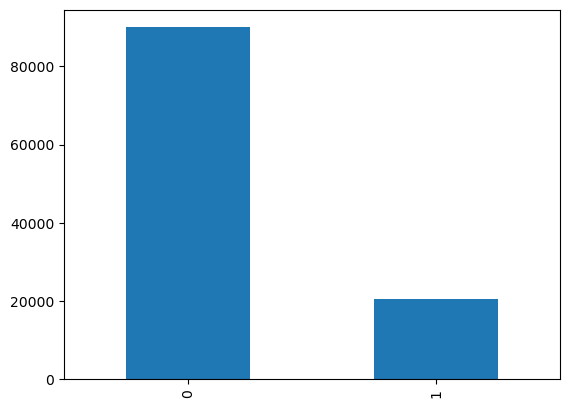

In [60]:
# Check our Target Variable

new.Target.value_counts().plot(kind = "bar")

<AxesSubplot:xlabel='Category2'>

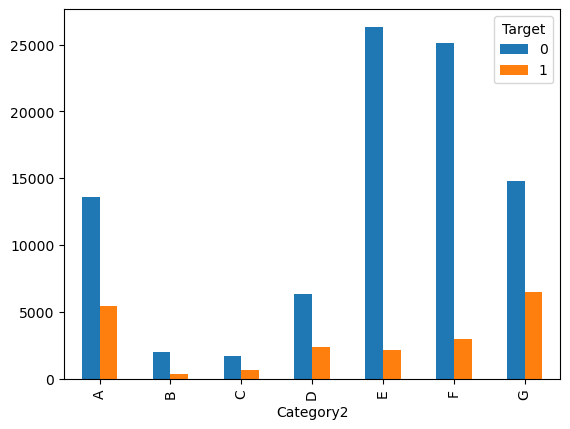

In [61]:
# Checking Pattern between Category1 and Target
pd.crosstab(new.Category2, new.Target).plot(kind = "bar")

In [62]:
# Apply Chi Square Test to check if the Cats have any Relation with Tgt

# Ho: That the Cat1 and the Target are Independent of Each Other.
# Ha: That the Cat1 has contribution towards predicting Target

tbl = pd.crosstab(new.Category1, new.Target)

import scipy.stats as stats

teststats, pvalue, dof, exp_freq = stats.chi2_contingency(tbl)

print(pvalue)

0.0


In [63]:
for i in new.columns:
    tbl = pd.crosstab(new.loc[:, i], new.Target)
    teststats, pvalue, dof, exp_freq = stats.chi2_contingency(tbl)
    print("Pvalue for", i, "Var:", np.round(pvalue))

Pvalue for Var1 Var: 0.0
Pvalue for Var2 Var: 0.0
Pvalue for Var3 Var: 0.0
Pvalue for Var4 Var: 0.0
Pvalue for Var5 Var: 0.0
Pvalue for Category1 Var: 0.0
Pvalue for Category2 Var: 0.0
Pvalue for Category3 Var: 0.0
Pvalue for Income Var: 0.0
Pvalue for Education_Score Var: 0.0
Pvalue for Age Var: 0.0
Pvalue for City_Type Var: 0.0
Pvalue for Employer_Category Var: 0.0
Pvalue for Online_Activity Var: 0.0
Pvalue for Interaction_Days Var: 0.0
Pvalue for Camp_Duration Var: 0.0
Pvalue for Headstart Var: 0.0
Pvalue for Camp_end_Reg_Duration Var: 0.0
Pvalue for Registration_Days Var: 0.0
Pvalue for Registration_Month Var: 0.0
Pvalue for Registration_Year Var: 0.0
Pvalue for Camp_Start_Year Var: 0.0
Pvalue for Camp_End_Year Var: 0.0
Pvalue for Camp_Start_Month Var: 0.0
Pvalue for Camp_End_Month Var: 0.0
Pvalue for Camp_Duration_Month Var: 0.0
Pvalue for Patient_Count_Reg_Date Var: 0.0
Pvalue for Patient_Per_Day Var: 0.0
Pvalue for Patient_Per_Month Var: 0.0
Pvalue for Patient_Per_Year Var: 0.0


In [64]:
# Online Activity
new.Online_Activity.replace(to_replace=[1,2,3,4], 
                            value=[1,1,1,1], 
                            inplace = True)    

<AxesSubplot:>

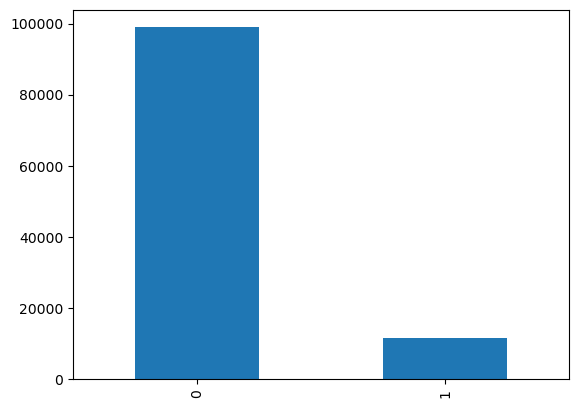

In [65]:
# Online Activity

new.Online_Activity.value_counts().plot(kind = "bar")

In [66]:
new["Category1"] = pd.factorize(new.Category1)[0]
new["Category2"] = pd.factorize(new.Category2)[0]

## Modeling

In [67]:
# Split the Data in Train and Test

newtrain = new.loc[0:train.shape[0]-1, :]
newtest = new.loc[train.shape[0]:, :]

In [68]:
train.shape, test.shape, newtrain.shape, newtest.shape

((75278, 8), (35249, 8), (75278, 35), (35249, 35))

In [69]:
# Prepare the X and y...
X = newtrain.drop("Target", axis = 1)
y = newtrain.Target
newtest = newtest.drop("Target", axis = 1)

In [70]:
! pip install catboost

In [72]:
! pip install lightgbm

     ---------------------------------------- 1.0/1.0 MB 6.5 MB/s eta 0:00:00


In [73]:
# Import the libraries
from sklearn.model_selection import cross_val_score, StratifiedKFold

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, \
GradientBoostingClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [74]:
# Make a Dictionary of Models and Run them in one go...

def base_models():
    models = dict()
    models["lg"] = LogisticRegression()
    models["tree"] = DecisionTreeClassifier(criterion="entropy")
    models["RF"] = RandomForestClassifier(criterion="entropy")
    models["Adaboost"] = AdaBoostClassifier()
    models["GBM"] = GradientBoostingClassifier()
    models["XGB"] = XGBClassifier()
    models["LGBM"] = LGBMClassifier()
    models["cboost"] = CatBoostClassifier()
    return models

In [75]:
# Evaluation Function

def eval_scores(model):
    cv = StratifiedKFold(n_splits=5, shuffle = True, random_state=42)
    scores = cross_val_score(model, X, y, scoring = "roc_auc", cv = cv,
                   error_score="raise", n_jobs=-1)
    return scores

In [76]:
# Build the Models and Generate the Scores

models = base_models()

result, names = list(), list()

for name, model in models.items():
    finalscore = eval_scores(model)
    result.append(finalscore)
    names.append(name)
    print(model)

LogisticRegression()
DecisionTreeClassifier(criterion='entropy')
RandomForestClassifier(criterion='entropy')
AdaBoostClassifier()
GradientBoostingClassifier()
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
LGBMClassifier()


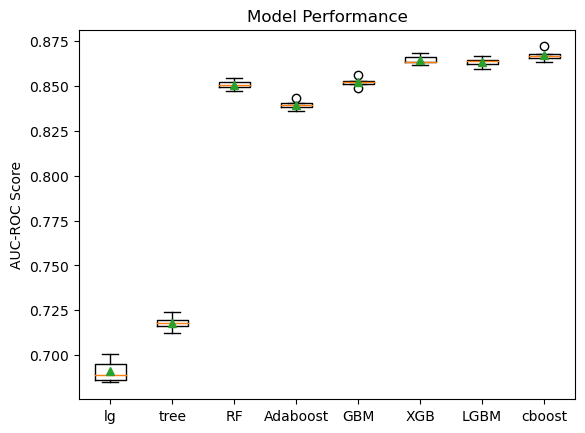

In [77]:
# Visualize the Scores
plt.boxplot(result, labels = names, showmeans=True)
plt.title("Model Performance")
plt.ylabel("AUC-ROC Score")
plt.show()

In [ ]:
# XGB, LGBM and CatBoost & Ensemble...

# Xgboost
xgboost = XGBClassifier()

pred_xgb = []
kfold = StratifiedKFold(n_splits=5, shuffle = True, random_state=42)

for train_index, test_index in kfold.split(X, y):
    xtrain = X.iloc[train_index]
    ytrain = y.iloc[train_index]
    pred_xgb.append(xgboost.fit(xtrain, ytrain).predict_proba(newtest))

In [ ]:
lgbm = LGBMClassifier()

pred_lgbm = []
kfold = StratifiedKFold(n_splits=5, shuffle = True, random_state=42)

for train_index, test_index in kfold.split(X, y):
    xtrain = X.iloc[train_index]
    ytrain = y.iloc[train_index]
    pred_lgbm.append(lgbm.fit(xtrain, ytrain).predict_proba(newtest))

In [ ]:
cboost = CatBoostClassifier()

pred_cboost = []
kfold = StratifiedKFold(n_splits=5, shuffle = True, random_state=42)

for train_index, test_index in kfold.split(X, y):
    xtrain = X.iloc[train_index]
    ytrain = y.iloc[train_index]
    pred_cboost.append(cboost.fit(xtrain, ytrain).predict_proba(newtest))

In [ ]:
one = pd.DataFrame(np.array(pred_cboost)[0])[1]
two = pd.DataFrame(np.array(pred_cboost)[1])[1]
third = pd.DataFrame(np.array(pred_cboost)[2])[1]
four = pd.DataFrame(np.array(pred_cboost)[3])[1]
five = pd.DataFrame(np.array(pred_cboost)[4])[1]

val = pd.DataFrame([one, two, third, four, five]).T.mean(axis = 1)

In [ ]:
# Submissions

# LGBM
submission = pd.DataFrame({"Patient_ID": test.Patient_ID, 
              "Health_Camp_ID":test.Health_Camp_ID,
              "Outcome":val})

In [ ]:
submission.to_csv("Catboost_Health.csv", index = False) # 0.713

# LGBM - 0.72753 & Cboost - 0.71

In [ ]:
from sklearn.ensemble import VotingClassifier
best_models = [("xgboost", xgboost), ("lgbm", lgbm)]

clf = VotingClassifier(estimators=best_models, voting = "soft", n_jobs=-1)

pred_cboost = []

kfold = StratifiedKFold(n_splits=5, shuffle = True, random_state=42)

for train_index, test_index in kfold.split(X, y):
    xtrain = X.iloc[train_index]
    ytrain = y.iloc[train_index]
    pred_cboost.append(clf.fit(xtrain, ytrain).predict_proba(newtest))

In [ ]:
one = pd.DataFrame(np.array(pred_cboost)[0])[1]
two = pd.DataFrame(np.array(pred_cboost)[1])[1]
third = pd.DataFrame(np.array(pred_cboost)[2])[1]
four = pd.DataFrame(np.array(pred_cboost)[3])[1]
five = pd.DataFrame(np.array(pred_cboost)[4])[1]

val = pd.DataFrame([one, two, third, four, five]).T.mean(axis = 1)

In [ ]:
# Submissions
submission = pd.DataFrame({"Patient_ID": test.Patient_ID, 
              "Health_Camp_ID":test.Health_Camp_ID,
              "Outcome":val})

In [ ]:
submission.to_csv("VotingClassifier.csv", index = False) # 0.7234

Next Step would be to Tune the Parameters of LGBM....

In [ ]:
# Feature Importance
pd.DataFrame(lgbm.feature_importances_, lgbm.feature_name_, 
            columns = ["Weightage"]).sort_values(by = "Weightage", 
                                                 ascending = False).plot(kind = "bar")